In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point

import libpysal
from libpysal.weights import Queen, KNN



**Author:** Bedilu A. Ejigu  
**Date:** 2025-06-03


# Spatial Data Exploration



Spatial data exploration depends on the type of spatial data under investigation.



## Areal / Lattice Type of Spatial Data



Areal or lattice type data analysis begins by considering **spatial dependence**, handled via a **spatial weights / neighborhood matrix**. In Python, the `pysal` and `libpysal` libraries provide similar functions to R's `spdep` for constructing **neighbor lists** and **spatial weights**.



### Data Preparation




- Load **polygon shapefile** and survey observations per polygon.

<Axes: >

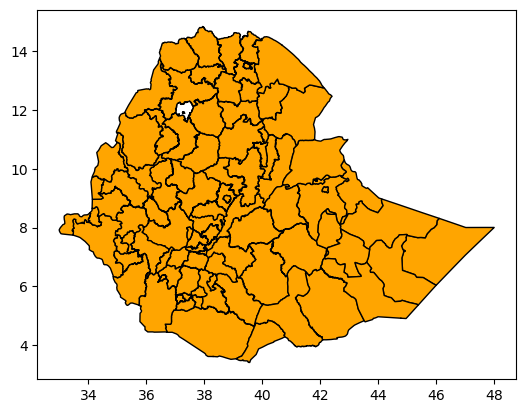

In [2]:
# Load Ethiopia Zone shapefile
ETH_Zone = gpd.read_file("Data/Shapefiles/ETH2021/eth_admbnda_adm2_csa_bofedb_2021.shp")
ETH_Zone.plot(color="orange", edgecolor="black")

In [3]:
# Load survey summary data
mcp_data = pd.read_csv("Data/mCP2019.csv")

# Add Average distance to SDP into the Zone shapefile
ETH_Zone["mcp"] = mcp_data["mcp"]
ETH_Zone["mean_dist"] = mcp_data["mean"]

# Subset relevant columns
ETHzone_mcp = ETH_Zone[["ADM2_EN", "ADM2_PCODE", "geometry", "mcp", "mean_dist"]]
ETHzone_mcp.head()


,ADM2_EN,ADM2_PCODE,geometry,mcp,mean_dist
0,Afder,ET0508,"POLYGON ((42.02878 6.61478, 42.03432 6.61348, ...",0.00,8.17
1,Agnewak,ET1202,"POLYGON ((34.82643 8.26194, 34.85509 8.25065, ...",38.58,0.48
2,Alle,ET0712,"POLYGON ((37.12605 5.72774, 37.12655 5.72627, ...",16.28,1.72
3,Amaro,ET0721,"POLYGON ((37.85677 5.9987, 37.86554 5.98663, 3...",24.98,1.69
4,Arsi,ET0408,"POLYGON ((39.92013 8.70959, 39.92602 8.70937, ...",39.33,3.10


### Neighborhood construction based on geographical proximity or contiguity

In [4]:
w = Queen.from_dataframe(ETHzone_mcp)
w.neighbors

/tmp/ipykernel_2153959/1749405675.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(ETHzone_mcp)


{0: [22, 70, 55],
 1: [49, 67, 56, 10, 43, 44, 60],
 2: [33, 18, 52, 77],
 3: [33, 18, 52, 85, 13],
 4: [82, 86, 22, 8, 25],
 5: [88, 57, 47],
 6: [83, 84, 59, 15, 47],
 7: [32, 65, 68, 41, 74, 78, 51, 30],
 8: [82, 4, 36, 22, 55],
 9: [35, 77],
 10: [48, 1, 71, 56, 60],
 11: [16, 36, 52, 85, 77, 13],
 12: [88, 26, 43, 46, 47],
 13: [11, 3, 52, 85],
 14: [81, 66, 75, 27, 62],
 15: [81, 83, 84, 6, 89, 76, 62],
 16: [11, 36, 55],
 17: [33, 50, 35, 53, 38, 90, 46],
 18: [33, 2, 3, 52],
 19: [24, 74, 20],
 20: [74, 19],
 21: [45, 54],
 22: [0, 4, 70, 8, 86, 55, 24, 28, 61],
 23: [64, 83, 87, 42, 76, 78],
 24: [19, 86, 22, 40, 74, 28, 29],
 25: [32, 64, 4, 37, 39, 73, 79, 82, 86, 31, 63],
 26: [83, 87, 42, 12, 46, 47],
 27: [75, 58, 51, 14],
 28: [29, 61, 22, 24, 45],
 29: [24, 74, 28, 45],
 30: [80, 65, 51, 7],
 31: [64, 69, 87, 25, 79],
 32: [86, 7, 41, 74, 25, 63],
 33: [2, 3, 35, 77, 17, 18, 85, 90],
 34: [72, 36, 85],
 35: [17, 33, 53, 9, 77],
 36: [34, 8, 72, 11, 16, 82, 85, 55],
 37:

In [5]:
neighbor_counts = {i:len(n) for i, n in w.neighbors.items()}
neighbor_counts

{0: 3,
 1: 7,
 2: 4,
 3: 5,
 4: 5,
 5: 3,
 6: 5,
 7: 8,
 8: 5,
 9: 2,
 10: 5,
 11: 6,
 12: 5,
 13: 4,
 14: 5,
 15: 7,
 16: 3,
 17: 7,
 18: 4,
 19: 3,
 20: 2,
 21: 2,
 22: 9,
 23: 6,
 24: 7,
 25: 11,
 26: 6,
 27: 4,
 28: 5,
 29: 4,
 30: 4,
 31: 5,
 32: 6,
 33: 8,
 34: 3,
 35: 5,
 36: 8,
 37: 7,
 38: 9,
 39: 5,
 40: 1,
 41: 4,
 42: 4,
 43: 8,
 44: 3,
 45: 5,
 46: 10,
 47: 7,
 48: 7,
 49: 5,
 50: 4,
 51: 5,
 52: 6,
 53: 5,
 54: 4,
 55: 5,
 56: 4,
 57: 3,
 58: 2,
 59: 3,
 60: 4,
 61: 5,
 62: 5,
 63: 6,
 64: 6,
 65: 6,
 66: 3,
 67: 2,
 68: 4,
 69: 1,
 70: 4,
 71: 4,
 72: 5,
 73: 4,
 74: 7,
 75: 6,
 76: 6,
 77: 9,
 78: 7,
 79: 4,
 80: 5,
 81: 7,
 82: 8,
 83: 7,
 84: 4,
 85: 8,
 86: 6,
 87: 8,
 88: 6,
 89: 4,
 90: 7,
 91: 3}

To visualize which polygon is a neighbor of others can be plotted as follows:


/home/natnael-getahun/anaconda3/envs/geo_spatial/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

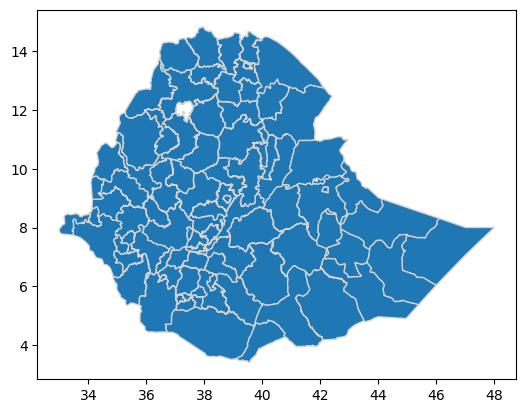

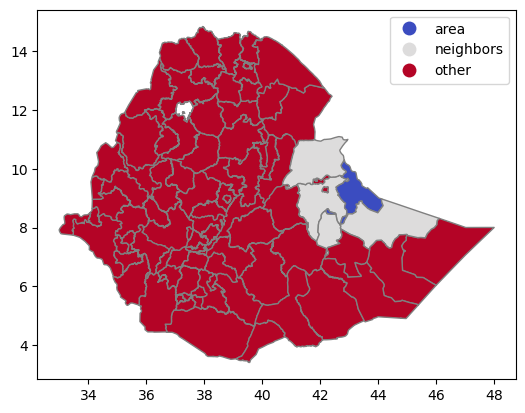

In [6]:
# Plot zones
ETHzone_mcp.plot(edgecolor='lightgray')

# Plot neighbors for a single zone
zone_id = 29
ETHzone_mcp["neighbors"] = "other"
ETHzone_mcp.loc[zone_id, "neighbors"] = "area"
ETHzone_mcp.loc[w.neighbors[zone_id], "neighbors"] = "neighbors"


ETHzone_mcp.plot(column="neighbors", cmap="coolwarm", legend=True, edgecolor="grey")

Other neighborhood constructions: K-nearest neighbors, distance-based neighbors.

### Spatial Weights


Once the neighborhood list created, the spatial weights matrix corresponding to a neighbors list can be created.


In [7]:
from libpysal.weights import lag_spatial

# Row-standardized weights
w.transform = "R"
# Binary style (B)
w_binary = w
w_binary.transform = "B"


**Spatial weights matrix based on inverse distance values**


In [8]:
from libpysal.weights import DistanceBand

coords = np.array([geom.centroid.coords[0] for geom in ETHzone_mcp.geometry])
w_dist = DistanceBand(coords, threshold=np.inf, binary=False)
w_dist.transform = "R"

/home/natnael-getahun/anaconda3/envs/geo_spatial/lib/python3.13/site-packages/scipy/sparse/_data.py:128: RuntimeWarning: divide by zero encountered in power
  return self._with_data(data ** n)


### Sptial autocorrelation



Before analyzing spatial data, you may ask "Is there spatial pattern? If so, how strong is it?". Spatial pattern suggests that measurements for areal units which are near to each other will tend to take more similar values than those for units far from each other.


#### Moran's I


**Global Moran's I**

The Global Moran’s *I* provides an index to assess the spatial autocorrelation for the whole study region.


In [ ]:
import esda

# Moran's I - global
mi = esda.Moran(ETHzone_mcp["mcp"], w)
mi.I, mi.p_sim, mi.z_sim

(np.float64(-0.054489165938808884),
 np.float64(0.265),
 np.float64(-0.6223556579360285))

(<Figure size 700x700 with 1 Axes>,
 <Axes: title={'center': 'Moran Scatterplot (-0.05)'}, xlabel='Attribute', ylabel='Spatial Lag'>)

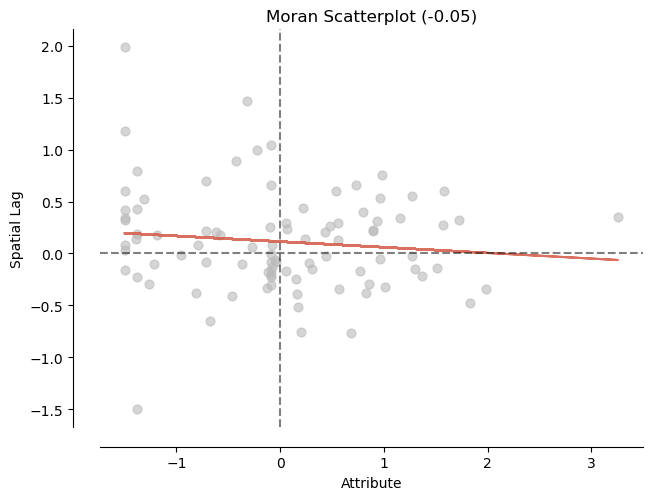

In [10]:
import splot.esda as esdaplot

esdaplot.moran_scatterplot(mi)

**Local Moran's I**

In addition to the Global Moran *I*, there is often interest in getting a local measure of similarity between each area’s value and those of nearby areas. Local Indicators of Spatial Association (LISA) are designed to provide an indication of the extent of significant spatial clustering of similar values around each observation. A desirable property is that the sum of the LISA’s values across all regions is equal to a multiple of the global indicator of spatial association.


In [11]:
lm = esda.Moran_Local(ETHzone_mcp["mcp"], w)
ETHzone_mcp["lmI"] = lm.Is
ETHzone_mcp["lmZ"] = lm.z_sim
ETHzone_mcp["lmp"] = lm.p_sim

/home/natnael-getahun/anaconda3/envs/geo_spatial/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/natnael-getahun/anaconda3/envs/geo_spatial/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/natnael-getahun/anaconda3/envs/geo_spatial/lib/python3.13/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A

<Axes: >

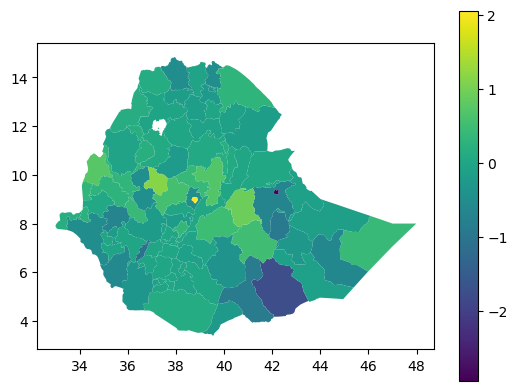

In [13]:
ETHzone_mcp.plot(column="lmI", cmap="viridis", legend=True)

**Example 2: HIV in South Africa**

/tmp/ipykernel_2153959/2445478024.py:9: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w2 = Queen.from_dataframe(district)


(<Figure size 700x700 with 1 Axes>,
 <Axes: title={'center': 'Moran Scatterplot (0.77)'}, xlabel='Attribute', ylabel='Spatial Lag'>)

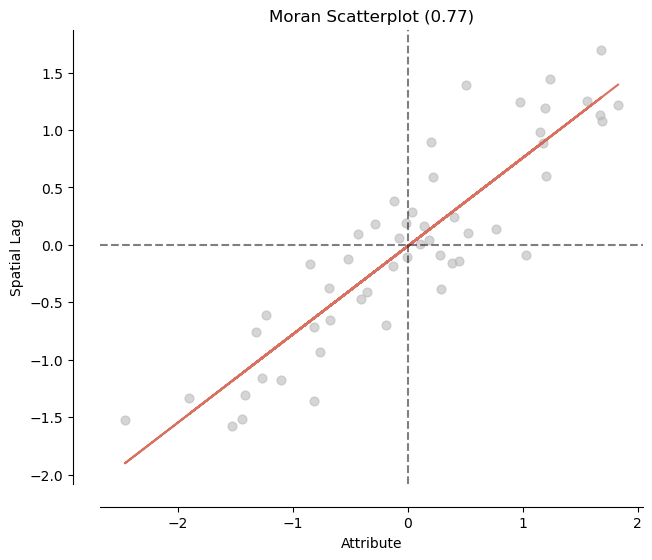

In [14]:
# Load South Africa district shapefile
district = gpd.read_file("Data/Shapefiles/SAZ/zaf_admbnda_adm2_sadb_ocha_20201109.shp")

# Load district HIV data
HIV_prev = pd.read_csv("Data/SA_Admn2_HIV.csv")
district["HIV"] = HIV_prev["HIV_prev"]

# Create weights
w2 = Queen.from_dataframe(district)
w2.transform = "R"

# Global Moran's I
mi2 = esda.Moran(district["HIV"], w2)
mi2.I, mi2.z_sim, mi2.p_sim

# Moran scatter plot
esdaplot.moran_scatterplot(mi2)


<Axes: >

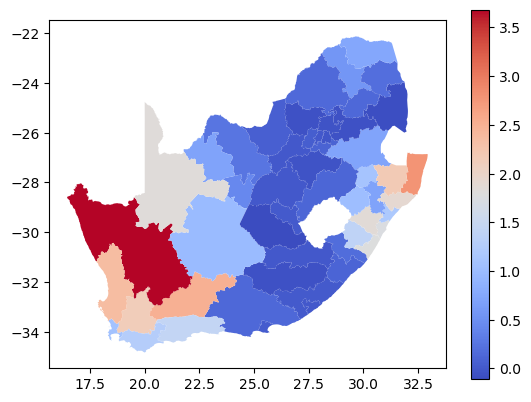

In [15]:
lm2 = esda.Moran_Local(district["HIV"], w2)
district["lmI"] = lm2.Is
district["lmZ"] = lm2.z_sim
district["lmp"] = lm2.p_sim

# Plot LISA
district.plot(column="lmI", cmap="coolwarm", legend=True)


# Spatial Autoregressive modeling


## Get the data and prepare the data for analysis

In [20]:
from sklearn.preprocessing import StandardScaler

# Load Meuse dataset (example)
data = pd.read_csv("Data/meuse_all.csv")

# Convert coordinates if needed
coords = data[["x", "y"]].values
data["long"] = data["x"]  # Replace with actual transformation if necessary
data["lat"] = data["y"]


In [21]:
data

,x,y,cadmium,copper,lead,zinc,elev,dist,om,ffreq,soil,lime,landuse,dist.m,long,lat
0,181072,333611,11.7,85,299,1022,7.909,0.001358,13.6,1,1,1,Ah,50,181072,333611
1,181025,333558,8.6,81,277,1141,6.983,0.012224,14.0,1,1,1,Ah,30,181025,333558
2,181165,333537,6.5,68,199,640,7.800,0.103029,13.0,1,1,1,Ah,150,181165,333537
3,181298,333484,2.6,81,116,257,7.655,0.190094,8.0,1,2,0,Ga,270,181298,333484
4,181307,333330,2.8,48,117,269,7.480,0.277090,8.7,1,2,0,Ah,380,181307,333330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,179184,330182,0.8,20,49,166,8.128,0.423837,4.7,3,1,0,Am,540,179184,330182
151,179085,330292,3.1,39,173,496,8.577,0.423837,9.1,3,1,0,Ah,520,179085,330292
152,178875,330311,2.1,31,119,342,8.429,0.277090,6.5,3,1,0,Ah,350,178875,330311
153,179466,330381,0.8,21,51,162,9.406,0.358606,5.7,3,1,0,W,460,179466,330381


## Weighting matrix construction



### Standard distance based weighting matrices

In [23]:
from scipy.spatial import distance_matrix

# standard distance-based matrices
sep_dist = distance_matrix(coords, coords)
w_exp = np.exp(-sep_dist)
np.fill_diagonal(w_exp, 0)
w_exp = w_exp / w_exp.sum(axis=1, keepdims=True)

inv_w = 1/ sep_dist
np.fill_diagonal(inv_w, 0)
inv_w = inv_w / inv_w.sum(axis=1, keepdims=True)

/tmp/ipykernel_2153959/916766814.py:9: RuntimeWarning: divide by zero encountered in divide
  inv_w = 1/ sep_dist


In [27]:
len(coords)

155

In [26]:
sep_dist.shape

(155, 155)

### Both Geographical proximity and covariate dependent weights

In [28]:
alpha1, alpha2, alpha3 = 0.2, 0.5, 0.8
dist_cov = coords  # Replace with actual covariate-based coords

pw1 = np.exp(-(alpha1 * distance_matrix(dist_cov, dist_cov) + (1-alpha1) * sep_dist))
np.fill_diagonal(pw1, 0)
pw1 = pw1 / pw1.sum(axis=1, keepdims=True)

pw2 = np.exp(-(alpha2 * distance_matrix(dist_cov, dist_cov) + (1-alpha2) * sep_dist))
np.fill_diagonal(pw2, 0)
pw2 = pw2 / pw2.sum(axis=1, keepdims=True)

pw3 = np.exp(-(alpha3 * distance_matrix(dist_cov, dist_cov) + (1-alpha3) * sep_dist))
np.fill_diagonal(pw3, 0)
pw3 = pw3 / pw3.sum(axis=1, keepdims=True)


## Model Fitting


### Classical linear model

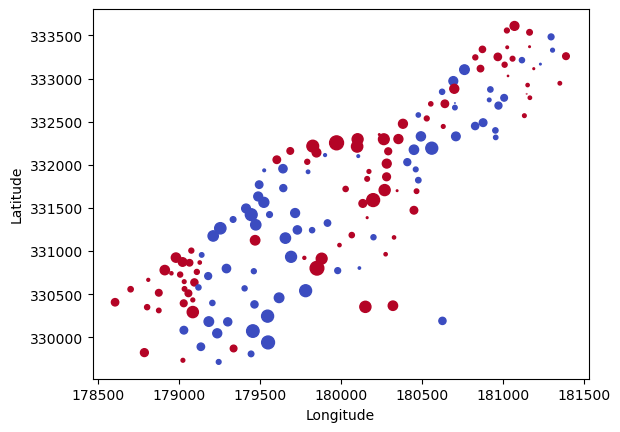

In [30]:
import statsmodels.api as sm

x = sm.add_constant(data[["elev", "dist.m"]])
y = np.log(data["lead"])
ols = sm.OLS(y,x).fit()
residuals = ols.resid

plt.scatter(data["long"], data["lat"], c=np.sign(residuals), s=np.abs(residuals)/max(abs(residuals))*100, cmap="coolwarm")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

The residual plot shows, errors are location dependent. Thus, to properly account the spatial effect, spatial data modeling approaches are needed.


In [31]:
from spreg import ML_Lag

# Log-transform copper
data['log_copper'] = np.log(data['copper'])

# Null model with w_Ex
st2_null = ML_Lag(data[['log_copper']], np.ones((len(data), 1)), w=w_exp, name_y='log_copper', name_x=['Intercept'])
# Null model with Inv_w
st3_null = ML_Lag(data[['log_copper']], np.ones((len(data), 1)), w=inv_w, name_y='log_copper', name_x=['Intercept'])

/home/natnael-getahun/anaconda3/envs/geo_spatial/lib/python3.13/site-packages/spreg/diagnostics_tsls.py:329: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  pr = pearsonr(y.flatten(), predy_e.flatten())[0]
/home/natnael-getahun/anaconda3/envs/geo_spatial/lib/python3.13/site-packages/spreg/diagnostics_tsls.py:329: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  pr = pearsonr(y.flatten(), predy_e.flatten())[0]


**A model with possible covariates using different weights**

In [33]:
# Model with covariates using w_Ex
X = data[['elev', 'dist.m']].values
st2_cov = ML_Lag(data['log_copper'].values, X, w=w_exp, name_y='log_copper', name_x=['elev', 'dist_m'])

# Model with covariates using Inv_w
st3_cov = ML_Lag(data['log_copper'].values, X, w=inv_w, name_y='log_copper', name_x=['elev', 'dist_m'])


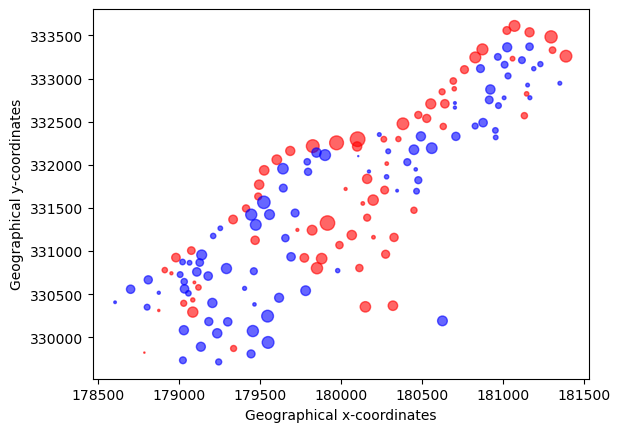

In [35]:
# Ensure resid is 1D
resid = st3_cov.u.ravel()  # or .flatten()

colors = np.where(resid > 0, 'red', 'blue')

plt.scatter(data['long'], data['lat'], 
            c=colors, 
            s=np.abs(resid)/max(np.abs(st2_cov.u.ravel()))*100, 
            alpha=0.6)
plt.xlabel("Geographical x-coordinates")
plt.ylabel("Geographical y-coordinates")
plt.show()


### Model fitting using proposed weighting matrices


**Null model**


In [36]:
pw1_null = ML_Lag(data['log_copper'].values, np.ones((len(data), 1)), w=pw1)
pw2_null = ML_Lag(data['log_copper'].values, np.ones((len(data), 1)), w=pw2)
pw3_null = ML_Lag(data['log_copper'].values, np.ones((len(data), 1)), w=pw3)

/home/natnael-getahun/anaconda3/envs/geo_spatial/lib/python3.13/site-packages/spreg/diagnostics_tsls.py:329: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  pr = pearsonr(y.flatten(), predy_e.flatten())[0]
/home/natnael-getahun/anaconda3/envs/geo_spatial/lib/python3.13/site-packages/spreg/diagnostics_tsls.py:329: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  pr = pearsonr(y.flatten(), predy_e.flatten())[0]
/home/natnael-getahun/anaconda3/envs/geo_spatial/lib/python3.13/site-packages/spreg/diagnostics_tsls.py:329: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  pr = pearsonr(y.flatten(), predy_e.flatten())[0]


**Model A: Including distance from the river only in W**

In [37]:
X_elev = data[['elev']].values
PW1 = ML_Lag(data['log_copper'].values, X_elev, w=pw1)
PW2 = ML_Lag(data['log_copper'].values, X_elev, w=pw2)
PW3 = ML_Lag(data['log_copper'].values, X_elev, w=pw3)


**Model B: Including covarite both in the mean structure and W**

In [39]:
X_cov = data[['elev', 'dist.m']].values
pw1_cov = ML_Lag(data['log_copper'].values, X_cov, w=pw1)
pw2_cov = ML_Lag(data['log_copper'].values, X_cov, w=pw2)
pw3_cov = ML_Lag(data['log_copper'].values, X_cov, w=pw3)


## Model Assessment


### R\^2

In [40]:
def pseudo_r2(model, null_model, n):
    return (1 - np.exp(-(2/n)*(model.logll-null_model.logll)))*100

n = len(data)
print(f"Standard-Model 2-R2: {pseudo_r2(st2_cov, st2_null, n):.3f}")
print(f"Standard-Model 3-R2: {pseudo_r2(st3_cov, st3_null, n):.3f}")
print(f"Proposed-Model 1-R2: {pseudo_r2(pw1_cov, pw1_null, n):.3f}")
print(f"Proposed-Model 2-R2: {pseudo_r2(pw2_cov, pw2_null, n):.3f}")
print(f"Proposed-Model 3-R2: {pseudo_r2(pw3_cov, pw3_null, n):.3f}")

Standard-Model 2-R2: 47.361
Standard-Model 3-R2: 51.472
Proposed-Model 1-R2: 47.361
Proposed-Model 2-R2: 47.361
Proposed-Model 3-R2: 47.361


### AIC

In [41]:
print("Standard-Model 2-AIC:", st2_cov.aic)
print("Standard-Model 3-AIC:", st3_cov.aic)
print("Proposed-Model 1-AIC:", pw1_cov.aic)
print("Proposed-Model 2-AIC:", pw2_cov.aic)
print("Proposed-Model 3-AIC:", pw3_cov.aic)


Standard-Model 2-AIC: 94.75676437256675
Standard-Model 3-AIC: 101.86998630066915
Proposed-Model 1-AIC: 94.75676437256675
Proposed-Model 2-AIC: 94.75676437256675
Proposed-Model 3-AIC: 94.75676437256675


### Mean square error

In [42]:
def mse(model):
    return np.mean(model.u**2)

print("Standard-W2-MSE:", mse(st2_cov))
print("Standard-W3-MSE:", mse(st3_cov))
print("Proposed-W1-MSE:", mse(pw1_cov))
print("Proposed-W2-MSE:", mse(pw2_cov))
print("Proposed-W3-MSE:", mse(pw3_cov))


Standard-W2-MSE: 0.09940303974926712
Standard-W3-MSE: 0.10546798660003258
Proposed-W1-MSE: 0.09940303974945898
Proposed-W2-MSE: 0.09940303974926712
Proposed-W3-MSE: 0.09940303974926712


### Moran residual test and plots

In [51]:
from libpysal.weights import util
from esda.moran import Moran

# Convert NumPy weight matrices to PySAL W objects
w_exp_pysal = util.full2W(w_exp)
inv_w_pysal = util.full2W(inv_w)
pw1_pysal = util.full2W(pw1)
pw2_pysal = util.full2W(pw2)
pw3_pysal = util.full2W(pw3)

# Moran function
def moran_test(model, w):
    return Moran(model.u.ravel(), w)  # flatten residuals

st2_moran = moran_test(st2_cov, w_exp_pysal)
st3_moran = moran_test(st3_cov, inv_w_pysal)
pw1_moran = moran_test(pw1_cov, pw1_pysal)
pw2_moran = moran_test(pw2_cov, pw2_pysal)
pw3_moran = moran_test(pw3_cov, pw3_pysal)

print("st2- Moran I:", st2_moran.I, "P-value:", st2_moran.p_sim)
print("st3- Moran I:", st3_moran.I, "P-value:", st3_moran.p_sim)
print("PW1- Moran I:", pw1_moran.I, "P-value:", pw1_moran.p_sim)
print("PW2- Moran I:", pw2_moran.I, "P-value:", pw2_moran.p_sim)
print("PW3- Moran I:", pw3_moran.I, "P-value:", pw3_moran.p_sim)


st2- Moran I: 0.1123588723841106 P-value: 0.117
st3- Moran I: 0.053594280935421804 P-value: 0.001
PW1- Moran I: 0.11235887239458406 P-value: 0.124
PW2- Moran I: 0.1123588723841106 P-value: 0.122
PW3- Moran I: 0.11235887238411062 P-value: 0.13


### Residual box plot

/tmp/ipykernel_2153959/1454684684.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


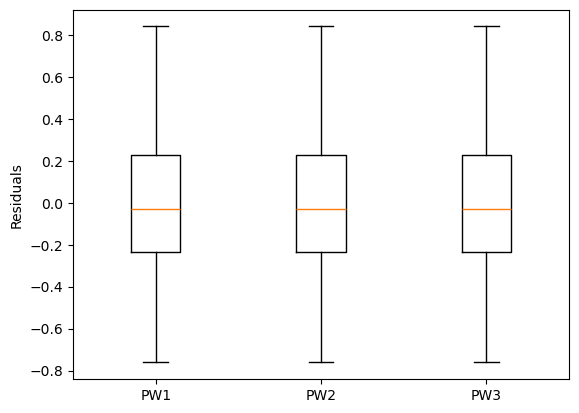

In [ ]:
plt.boxplot(
    [pw1_cov.u.ravel(), pw2_cov.u.ravel(), pw3_cov.u.ravel()],
    labels=['PW1', 'PW2', 'PW3']
)
plt.ylabel("Residuals")
plt.show()


SAR Model Example (using PySAL / spreg)

In [70]:
from spreg import ML_Lag

# SAR model with covariates and weights
model = ML_Lag(y.values.reshape(-1,1), x.values, w=w_exp, name_y="log_lead", name_x=["const","elev","dist.m"])
model.summary


"REGRESSION RESULTS\n------------------\n\nSUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)\n-----------------------------------------------------------------\nData set            :     unknown\nWeights matrix      :     unknown\nDependent Variable  :    log_lead                Number of Observations:         155\nMean dependent var  :      4.8071                Number of Variables   :           4\nS.D. dependent var  :      0.6665                Degrees of Freedom    :         151\nPseudo R-squared    :      0.6842\nSpatial Pseudo R-squared:  0.5839\nLog likelihood      :    -71.4400\nSigma-square ML     :      0.1396                Akaike info criterion :     150.880\nS.E of regression   :      0.3736                Schwarz criterion     :     163.054\n\n------------------------------------------------------------------------------------\n            Variable     Coefficient       Std.Error     z-Statistic     Probability\n--------------------------------------------

Residuals Moran’s I:

In [73]:
from libpysal.weights import full2W
import esda

# w_exp: NumPy 2D adjacency/distance matrix (0/1 or weights)
w = full2W(w_exp)  # convert NumPy array to PySAL W object
w.transform = 'r'   # row-standardize

resid = model.u  # residuals from SAR
mi_resid = esda.Moran(resid.flatten(), w)

print(mi_resid.I, mi_resid.z_sim, mi_resid.p_sim)


0.13573919809555504 1.4537830534008072 0.071


Model Assessment Metrics

In [77]:
R2 = model.pr2
R2


0.6841994505602391

/tmp/ipykernel_2153959/3598409171.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([pw1.flatten(), pw2.flatten(), pw3.flatten()], labels=["PW1","PW2","PW3"])


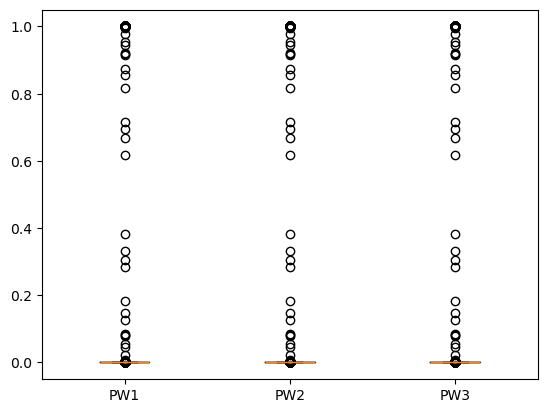

In [78]:
plt.boxplot([pw1.flatten(), pw2.flatten(), pw3.flatten()], labels=["PW1","PW2","PW3"])
plt.show()
